In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import csv
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import random

Number of images: 1183
Image dimensions and channels: (480, 640, 3)


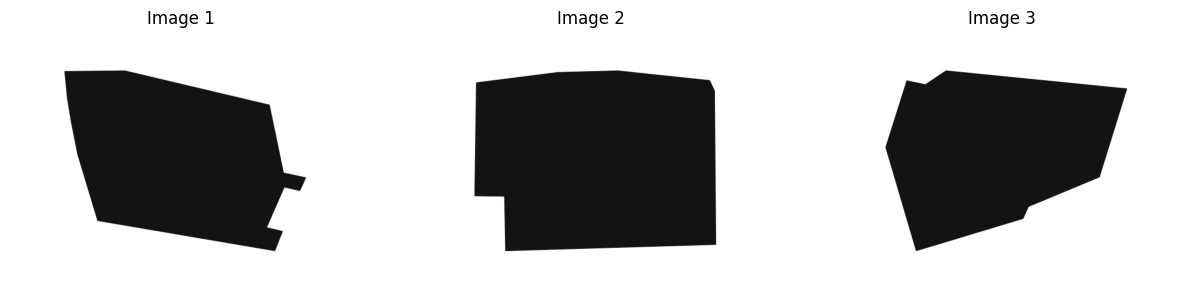

In [ ]:
# Path to the directory containing images
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/E7-images'

# Function to display sample images
def display_sample_images(num_images=3):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        random_image_path = np.random.choice(os.listdir(dataset_dir))
        image_path = os.path.join(dataset_dir, random_image_path)

        # Load the image as grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Display the grayscale image
        axes[i].imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images

        # Hide the axis (remove ticks and labels)
        axes[i].axis('off')

        # Set a title for the subplot indicating the image number
        axes[i].set_title(f'Image {i+1}')

# Call the function to display sample images
display_sample_images()

# Get basic statistics
num_images = len(os.listdir(dataset_dir))
print("Number of images:", num_images)

# Check image dimensions and channels
image_shape = cv2.imread(os.path.join(dataset_dir, os.listdir(dataset_dir)[0])).shape
print("Image dimensions and channels:", image_shape)



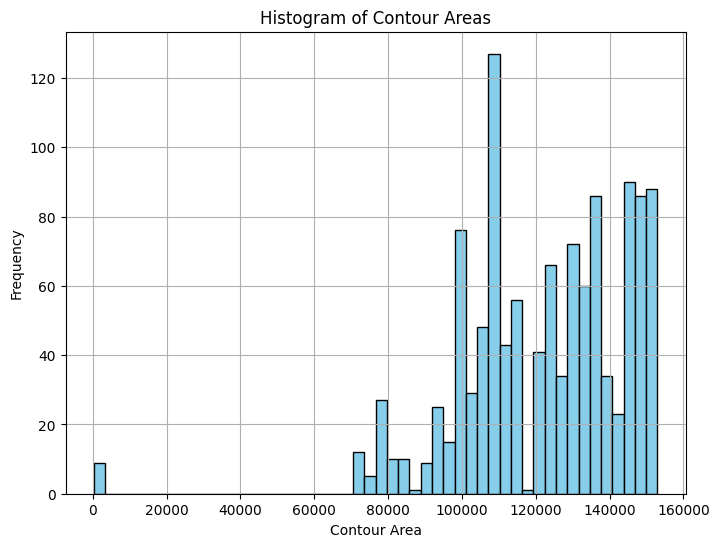

In [ ]:
# List to store contour areas
contour_areas = []

# Loop through all images in the dataset directory
for filename in os.listdir(dataset_dir):
    # Construct the full path to the image file
    img_path = os.path.join(dataset_dir, filename)

    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    canny = cv2.Canny(gray, 125, 175)

    # Find contours
    contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Calculate area of each contour and add it to the list
    for contour in contours:
        area = cv2.contourArea(contour)
        contour_areas.append(area)

# Plot histogram of contour areas
plt.figure(figsize=(8, 6))
plt.hist(contour_areas, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Contour Areas')
plt.xlabel('Contour Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

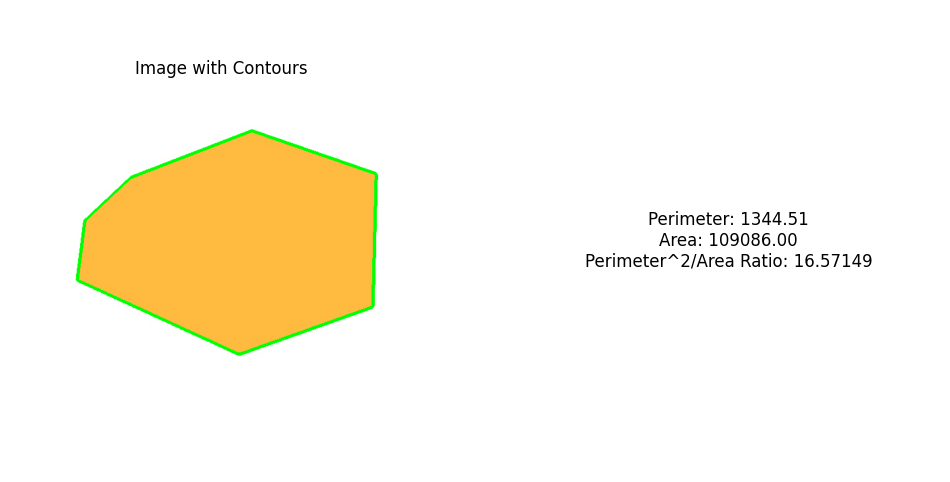

In [ ]:
# Choose a random image path
random_image_path = os.path.join(dataset_dir, np.random.choice(os.listdir(dataset_dir)))

# Load the image
img = cv2.imread(random_image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gray, 125, 175)

# Find contours
contours, hierarchies = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Calculate perimeter of the largest contour
perimeter = cv2.arcLength(contours[0], True)

# Calculate area of the largest contour
area = cv2.contourArea(contours[0])

# Calculate perimeter to area ratio
ratio = (perimeter*perimeter) / area

# Draw contours on the original image
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)

# Display the image with contours, perimeter, area, and ratio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Contours')

plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, f'Perimeter: {perimeter:.2f}\nArea: {area:.2f}\nPerimeter^2/Area Ratio: {ratio:.5f}',
         fontsize=12, ha='center', va='center')
plt.axis('off')

plt.show()


<ipython-input-51-edaf3d502af7>:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


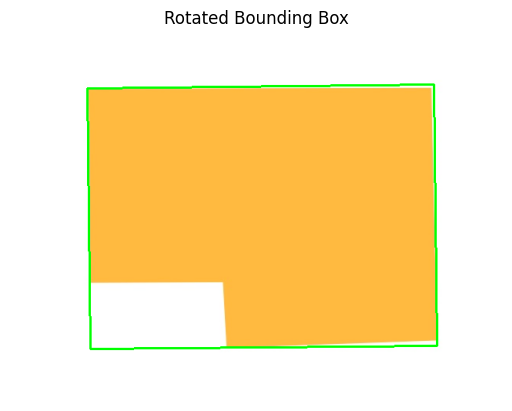

Center (x, y): (327.4554443359375, 241.13311767578125)
Width: 338.8497009277344
Height: 450.0480651855469
Angle of Rotation (degrees): 89.41537475585938


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '0402.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gray, 125, 175)

# Find contours
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Get the rotated bounding box
rotated_rect = cv2.minAreaRect(contours[0])
center, (w, h), theta = rotated_rect

# Draw the rotated bounding box on the original image
box = cv2.boxPoints(rotated_rect)
box = np.int0(box)
boxed_image = cv2.drawContours(img.copy(), [box], 0, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated Bounding Box')
plt.show()

# Print the parameters of the rotated bounding box
print("Center (x, y):", center)
print("Width:", w)
print("Height:", h)
print("Angle of Rotation (degrees):", theta)


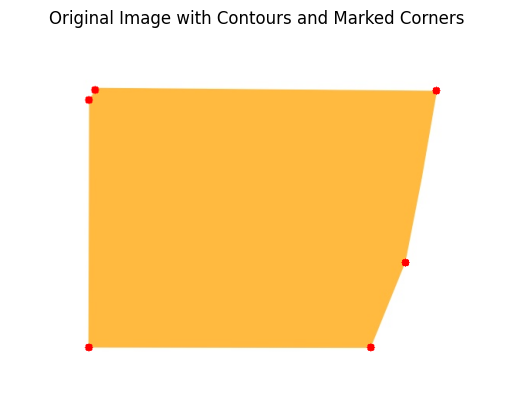

Total number of corners: 6


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '1000.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variable to store total corners
total_corners = 0

# Iterate through contours and approximate corners
for contour in contours:
    # Approximate polygonal curve
    epsilon = 0.005 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Count corners in the approximated contour
    num_corners = len(approx)

    # Draw circles at corner points
    for corner in approx:
        x, y = corner[0]
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Draw a red circle at the corner point

    # Accumulate total corners
    total_corners += num_corners

# Display the image with contours and marked corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contours and Marked Corners')
plt.axis('off')
plt.show()

print("Total number of corners:", total_corners)


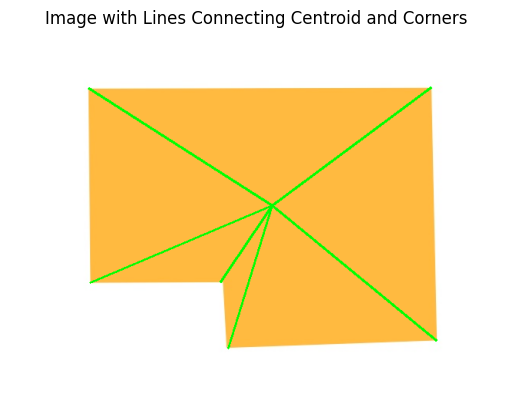

Sum of distances from centroid to corners: 1384.1049039016382


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '0402.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store centroid coordinates and total distance
centroid_x, centroid_y = 0, 0
total_distance = 0

# Iterate through contours and approximate corners
for contour in contours:
    # Calculate centroid of the contour
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])

    # Approximate polygonal curve
    epsilon = 0.005 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Calculate distance from centroid to corners and draw lines
    for corner in approx:
        corner_x, corner_y = corner.ravel()
        distance = np.sqrt((centroid_x - corner_x) ** 2 + (centroid_y - corner_y) ** 2)
        total_distance += distance
        cv2.line(img, (centroid_x, centroid_y), (corner_x, corner_y), (0, 255, 0), 2)

# Display the image with lines connecting centroid and corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Lines Connecting Centroid and Corners')
plt.axis('off')
plt.show()

# Print the sum of distances
print("Sum of distances from centroid to corners:", total_distance)


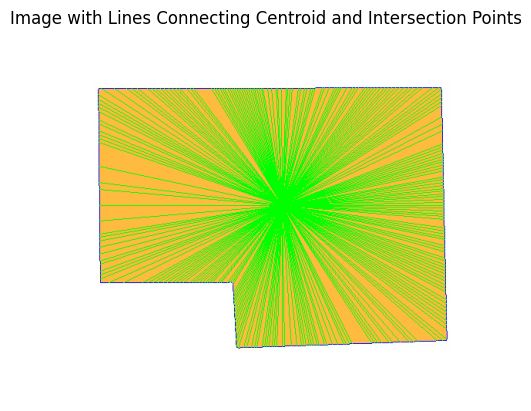

Sum of distances from centroid to intersection points: 51787.20192974003


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '0402.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store centroid coordinates and total distance
centroid_x, centroid_y = 0, 0
total_distance = 0

# Iterate through contours and calculate centroid
for contour in contours:
    # Calculate centroid of the contour
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])

    # Draw contour
    cv2.drawContours(img, [contour], 0, (255, 0, 0), 1)

    # Get the boundary points of the contour
    boundary_points = contour.squeeze(1)

    # Define the number of angles (lines) to draw
    num_angles = 360
    angle_step = 360 / num_angles

    # Iterate through angles
    for angle_deg in range(0, 360, int(angle_step)):
        # Convert angle to radians
        angle_rad = math.radians(angle_deg)

        # Calculate x and y coordinates of the line
        x1 = centroid_x
        y1 = centroid_y
        x2 = centroid_x + 1000 * np.cos(angle_rad)
        y2 = centroid_y + 1000 * np.sin(angle_rad)

        # Initialize minimum distance
        min_distance = float('inf')

        # Initialize intersection point
        intersection_point = None

        # Convert boundary_points to a list
        boundary_points_list = boundary_points.tolist()

        # Iterate through contour points to find the intersection
        for i, point in enumerate(boundary_points_list):
            x3, y3 = point[0], point[1]
            x4, y4 = boundary_points_list[(i + 1) % len(boundary_points_list)]

            # Check if the lines intersect
            denominator = ((x1 - x2) * (y3 - y4)) - ((y1 - y2) * (x3 - x4))
            if denominator != 0:
                intersect_x = (((x1 * y2) - (y1 * x2)) * (x3 - x4) - ((x1 - x2) * (x3 * y4 - y3 * x4))) / denominator
                intersect_y = (((x1 * y2) - (y1 * x2)) * (y3 - y4) - ((y1 - y2) * (x3 * y4 - y3 * x4))) / denominator

                # Check if intersection point is within line segments
                if (min(x1, x2) <= intersect_x <= max(x1, x2) and min(y1, y2) <= intersect_y <= max(y1, y2)) and (
                        min(x3, x4) <= intersect_x <= max(x3, x4) and min(y3, y4) <= intersect_y <= max(y3, y4)):
                    # Calculate distance from centroid to intersection point
                    distance = np.sqrt((centroid_x - intersect_x) ** 2 + (centroid_y - intersect_y) ** 2)
                    if distance < min_distance:
                        min_distance = distance
                        intersection_point = (int(intersect_x), int(intersect_y))

        # Draw line from centroid to intersection point
        if intersection_point:
            total_distance += min_distance
            cv2.line(img, (centroid_x, centroid_y), intersection_point, (0, 255, 0), 1)

# Display the image with lines connecting centroid and intersection points
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Lines Connecting Centroid and Intersection Points')
plt.axis('off')
plt.show()

# Print the sum of distances
print("Sum of distances from centroid to intersection points:", total_distance)


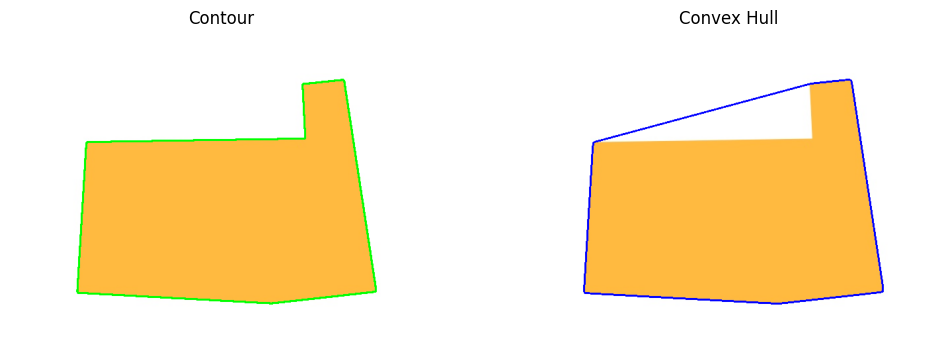

Ratio of convex hull area to  contour area: 1.1303784464168372


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '0069.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Select the largest contour
contour = max(contours, key=cv2.contourArea)

# Calculate convex hull
hull = cv2.convexHull(contour)

# Calculate area of contour and convex hull
contour_area = cv2.contourArea(contour)
hull_area = cv2.contourArea(hull)

# Calculate ratio of contour area to convex hull area
ratio = hull_area / contour_area

# Draw contour and convex hull on the image
image_with_contour = cv2.drawContours(img.copy(), [contour], -1, (0, 255, 0), 2)
image_with_hull = cv2.drawContours(img.copy(), [hull], -1, (255, 0, 0), 2)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image_with_contour, cv2.COLOR_BGR2RGB))
axes[0].set_title('Contour')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_with_hull, cv2.COLOR_BGR2RGB))
axes[1].set_title('Convex Hull')
axes[1].axis('off')
plt.show()

print("Ratio of convex hull area to  contour area:", ratio)


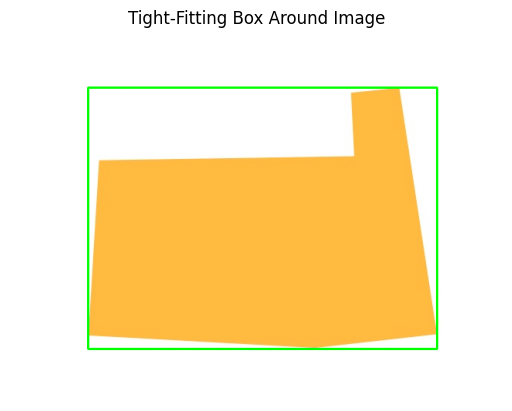

Ratio of tight box area to contour area: 1.4212981387729413


In [ ]:
# Load the image
image_path = os.path.join(dataset_dir, '0069.jpg')
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gray, 125, 175)

# Find contours
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Get the minimum bounding rectangle around the contour
x, y, w, h = cv2.boundingRect(contours[0])

# Calculate area of the tight-fitting box
box_area = w * h

# Calculate area of the contour
contour_area = cv2.contourArea(contours[0])

# Calculate the ratio of tight box area to contour area
ratio = box_area / contour_area

# Draw the bounding rectangle on the original image
boxed_image = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Tight-Fitting Box Around Image')
plt.show()

print("Ratio of tight box area to contour area:", ratio)


In [ ]:
# Create or open the CSV file
output_csv_path = '/content/features.csv'
with open(output_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image Name', 'Perimeter^2/Area Ratio', 'Total Corners', 'Sum of Distances from Centroid', 'Hull to Contour Area Ratio', 'Box to Contour Area Ratio', 'Layout Area', 'Area of Tight Fitting Box', 'Length of Tight Fitting Box', 'Width of Tight Fitting Box'])  # Header row

    # Iterate over images in the dataset directory
    for image_name in os.listdir(dataset_dir):
        # Load the image
        image_path = os.path.join(dataset_dir, image_name)
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        canny = cv2.Canny(gray, 125, 175)

        # Find contours
        contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        if contours:
            # Get the rotated bounding box
            rotated_rect = cv2.minAreaRect(contours[0])
            center, (w, h), theta = rotated_rect

            # Calculate area of the tight-fitting box
            box_area = w * h

            # Calculate layout area (contour area)
            contour_area = cv2.contourArea(contours[0])

            # Calculate the ratio of tight box area to contour area
            box_ratio = box_area / contour_area

            # Calculate perimeter and area of the contour
            perimeter = cv2.arcLength(contours[0], True)
            area = cv2.contourArea(contours[0])

            # Calculate perimeter^2/Area ratio
            ratio = (perimeter * perimeter) / area

            # Calculate number of corners
            epsilon = 0.005 * cv2.arcLength(contours[0], True)
            approx = cv2.approxPolyDP(contours[0], epsilon, True)
            total_corners = len(approx)

            # Calculate centroid of the contour
            M = cv2.moments(contours[0])
            centroid_x = int(M['m10'] / M['m00'])
            centroid_y = int(M['m01'] / M['m00'])

            # Calculate sum of distances from centroid to corners
            total_distance = 0
            for corner in approx:
                corner_x, corner_y = corner.ravel()
                distance = np.sqrt((centroid_x - corner_x) ** 2 + (centroid_y - corner_y) ** 2)
                total_distance += distance

            # Calculate convex hull
            hull = cv2.convexHull(contours[0])

            # Calculate area of contour and convex hull
            contour_area = cv2.contourArea(contours[0])
            hull_area = cv2.contourArea(hull)

            # Calculate ratio of contour area to convex hull area
            hull_ratio = hull_area / contour_area

            # Write the data to the CSV file
            writer.writerow([image_name, ratio, total_corners, total_distance, hull_ratio, box_ratio, contour_area, box_area, w, h])
        else:
            print(f"No contours found for {image_name}")

print("Data saved to:", output_csv_path)


Data saved to: /content/features.csv


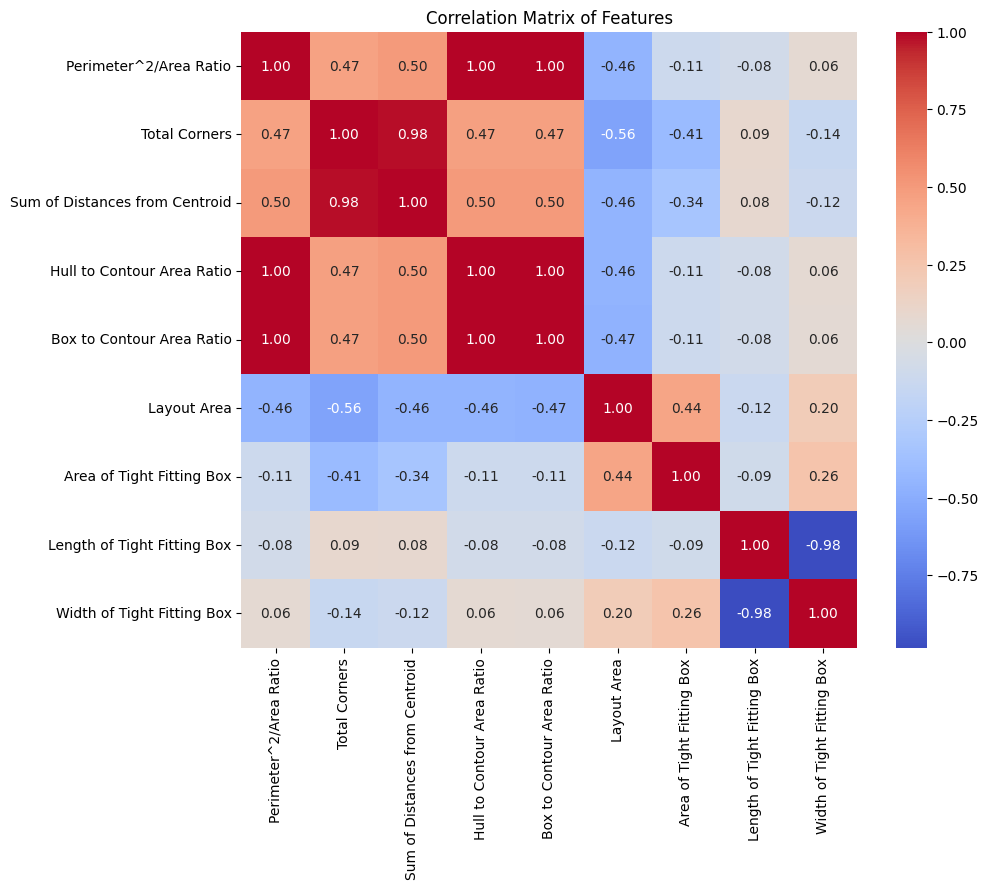

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv(output_csv_path)

# Drop the "Image Name" column before computing| the correlation matrix
data_numeric = data.drop(columns=['Image Name'])

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


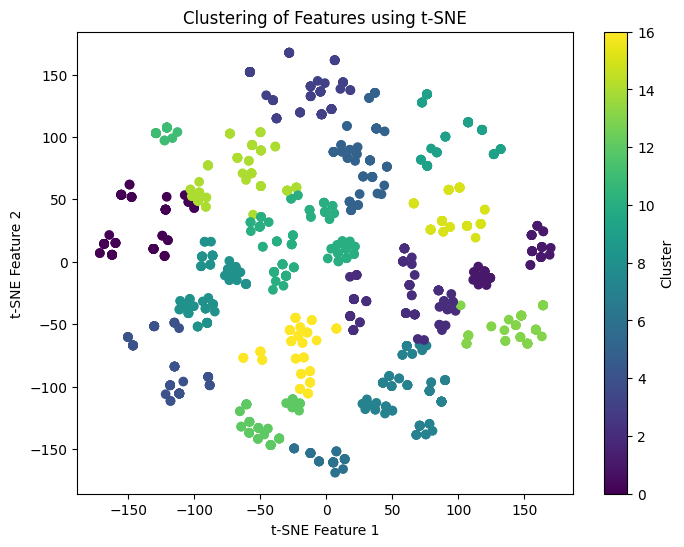

In [ ]:
# Load the features from the CSV file
features_csv_path = '/content/features.csv'
with open(features_csv_path, 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)
    features_data = [row for row in reader]

# Extract features
features = np.array(features_data)[:, 1:].astype(float)  # Exclude the image name column

# Select specific columns
columns_to_keep = ['Perimeter^2/Area Ratio','Total Corners','Layout Area']  # Adjust with the names of columns you want to keep
columns_to_keep_indices = [headers.index(col) for col in columns_to_keep]
features_new = features[:, columns_to_keep_indices]

# Define the number of clusters
n_clusters = 17  # Adjust as needed

# Perform Min-Max scaling on the features_new
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_features = tsne.fit_transform(scaled_features)

# Perform K-means clustering on the reduced features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering of Features using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import os

# Directory containing the images
image_directory = dataset_dir

# Get the paths of all images in the directory
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith('.jpg')]

# Now you can use image_paths in the loop to store image paths corresponding to each cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


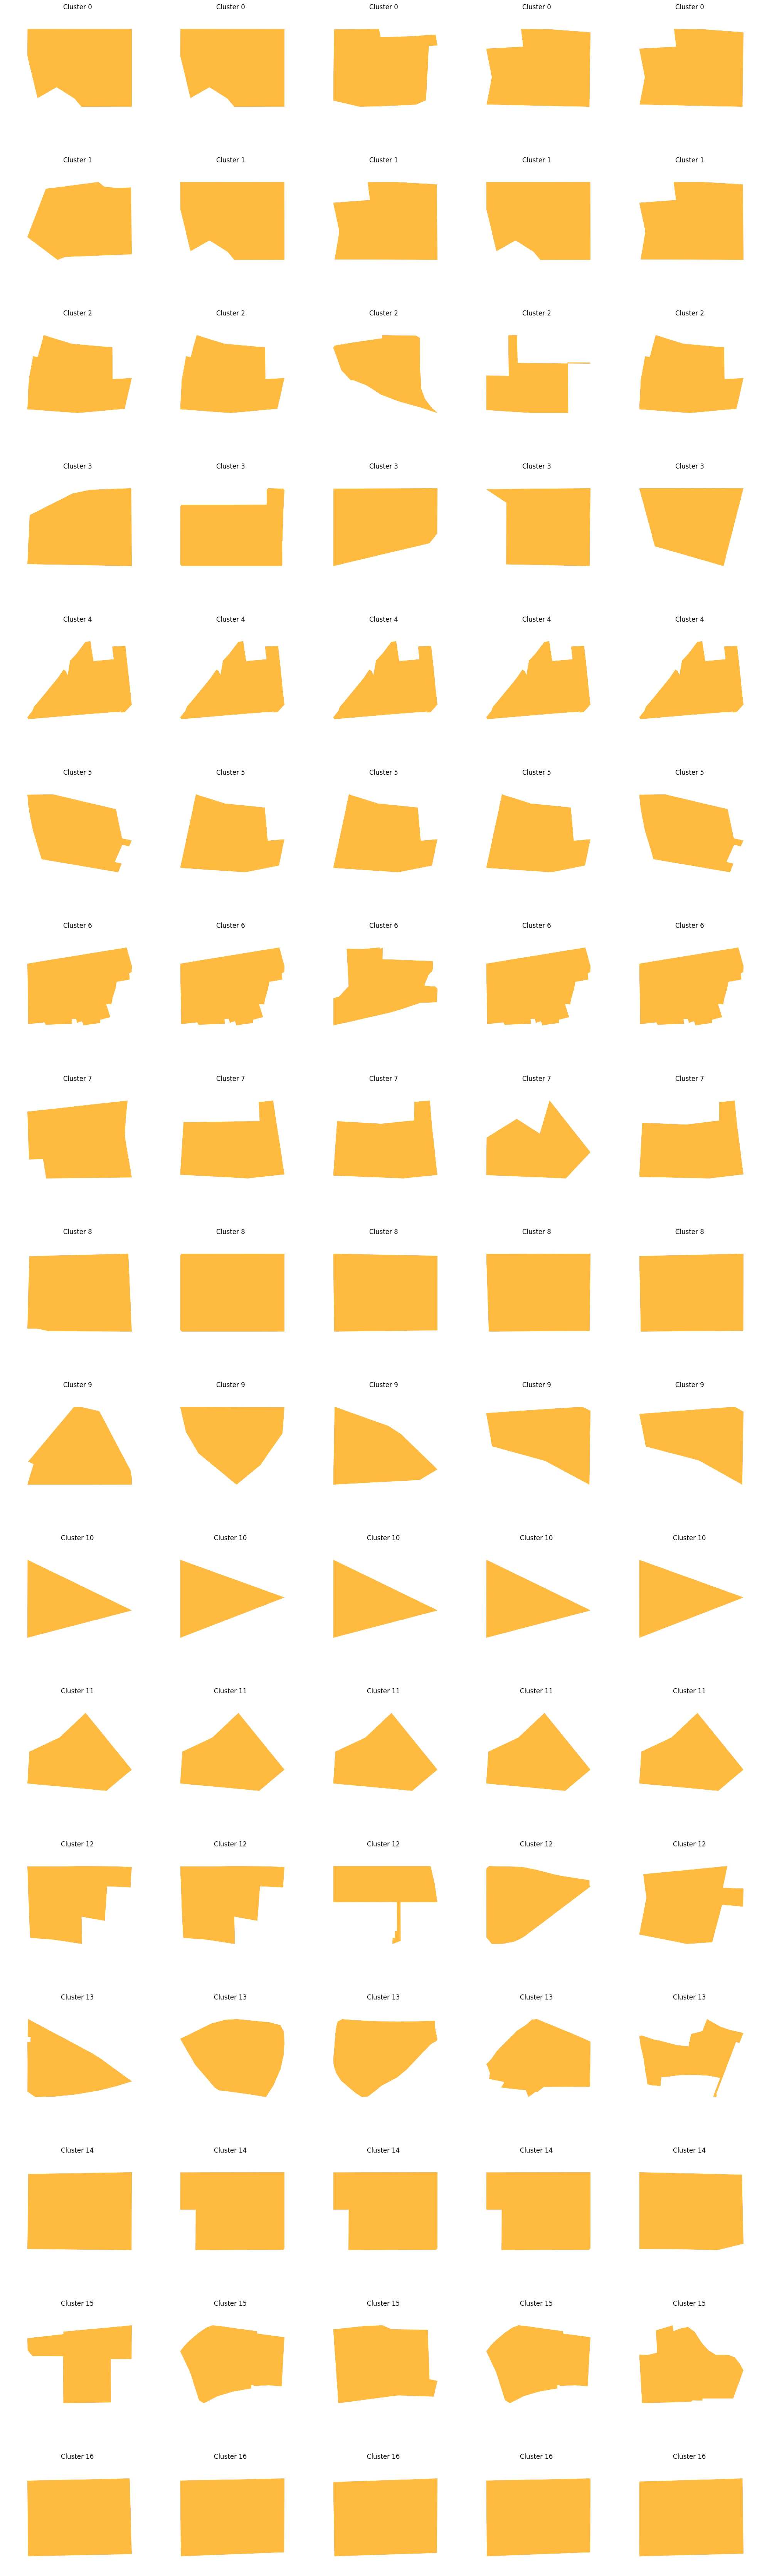

In [ ]:
# Define the number of clusters
n_clusters = 17  # Adjust as needed

# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Define the figure size and number of images to display per cluster
num_images_per_cluster = 5
figure_width = 20
figure_height = n_clusters * 4  # Adjust the multiplier as needed

# Create a dictionary to store image paths for each cluster
cluster_images = {i: [] for i in range(n_clusters)}

# Store image paths corresponding to each cluster
for cluster_id, image_path in zip(cluster_labels, image_paths):
    cluster_images[cluster_id].append(image_path)

# Display images from each cluster
plt.figure(figsize=(figure_width, figure_height))
for cluster_id, images in cluster_images.items():
    # Randomly select images from each cluster
    selected_images = np.random.choice(images, num_images_per_cluster, replace=False)
    for i, image_path in enumerate(selected_images):
        plt.subplot(n_clusters, num_images_per_cluster, cluster_id * num_images_per_cluster + i + 1)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image, interpolation='nearest')  # Adjust interpolation method if needed
        plt.title(f'Cluster {cluster_id}')
        plt.axis('off')
plt.tight_layout()
plt.show()


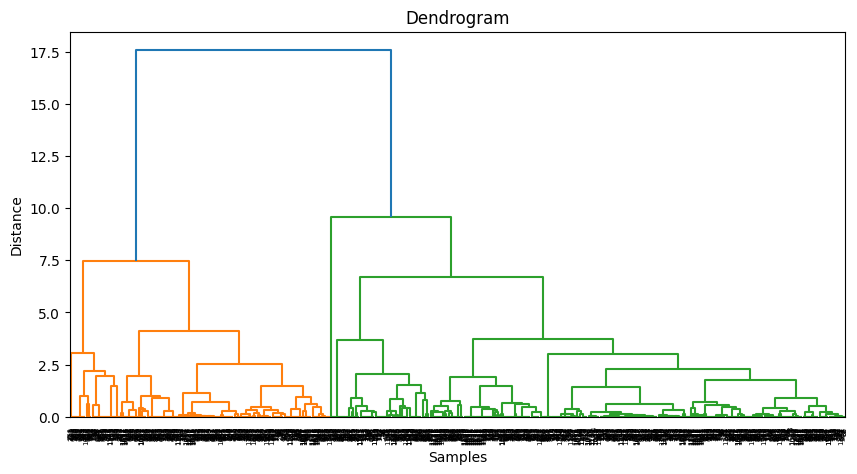

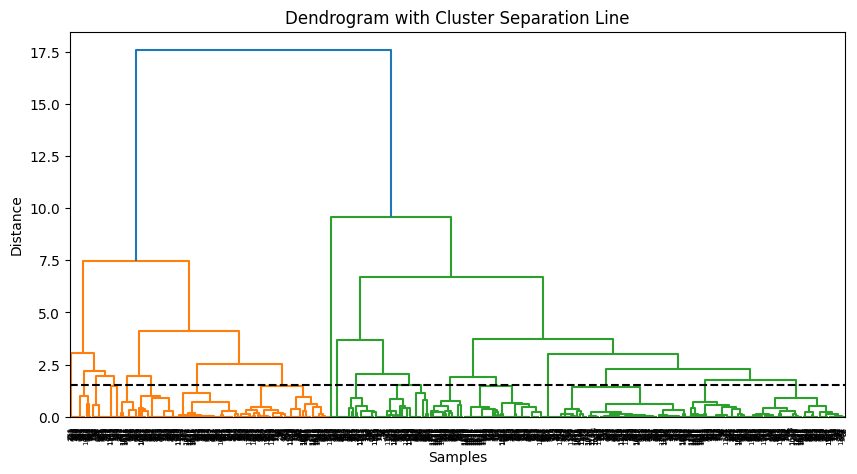

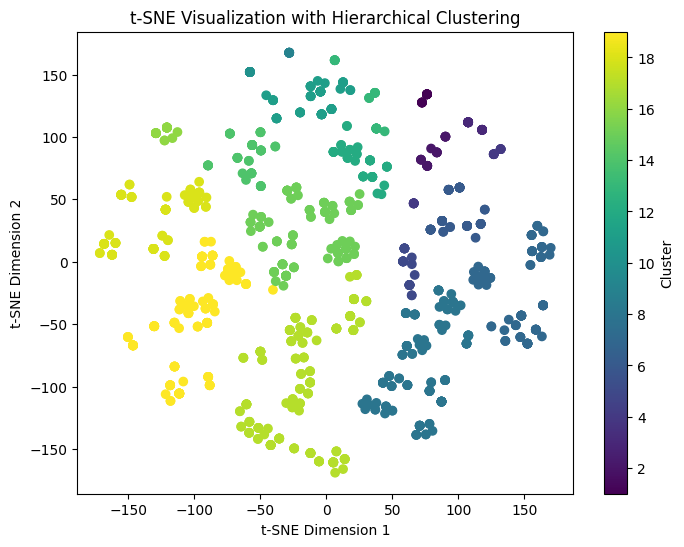

Number of clusters: 19


In [ ]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Perform hierarchical clustering using t-SNE features
Z = linkage(scaled_features, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine the number of clusters
max_d = 1.5  # you can adjust this threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Plot dendrogram with cluster separation line
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram with Cluster Separation Line')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=max_d, c='k', linestyle='--')
plt.show()

# Determine the number of clusters based on the dendrogram
num_clusters = len(np.unique(clusters))

# Plot t-SNE visualization with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Visualization with Hierarchical Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

print("Number of clusters:", num_clusters)


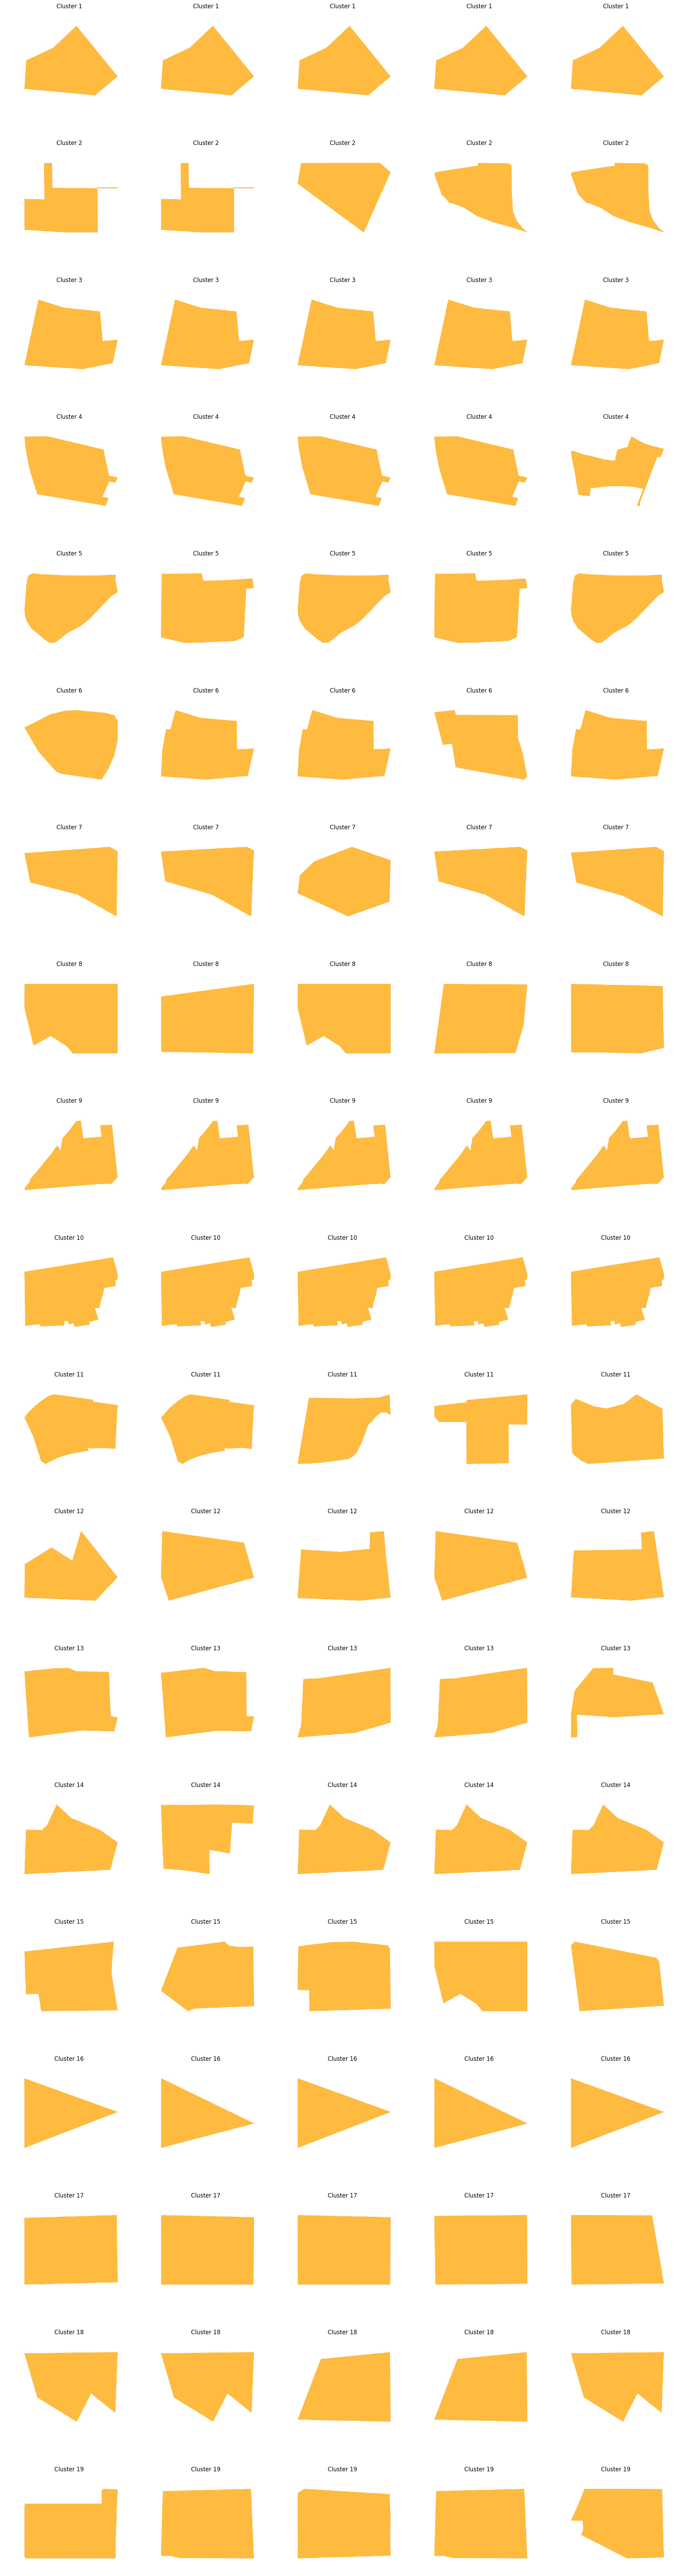

In [ ]:
# Define the figure size and number of images to display per cluster
num_images_per_cluster = 5
figure_width = 20
figure_height = num_clusters * 4  # Adjust the multiplier as needed

# Create a dictionary to store image paths for each cluster
cluster_images = {i: [] for i in range(1, num_clusters + 1)}

# Store image paths corresponding to each cluster
for cluster_id, image_path in zip(clusters, image_paths):
    cluster_images[cluster_id].append(image_path)

# Display images from each cluster
plt.figure(figsize=(figure_width, figure_height))
for cluster_id, images in cluster_images.items():
    # Randomly select images from each cluster
    selected_images = np.random.choice(images, num_images_per_cluster, replace=False)
    for i, image_path in enumerate(selected_images):
        plt.subplot(num_clusters, num_images_per_cluster, (cluster_id - 1) * num_images_per_cluster + i + 1)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image, interpolation='nearest')  # Adjust interpolation method if needed
        plt.title(f'Cluster {cluster_id}')
        plt.axis('off')
plt.tight_layout()
plt.show()


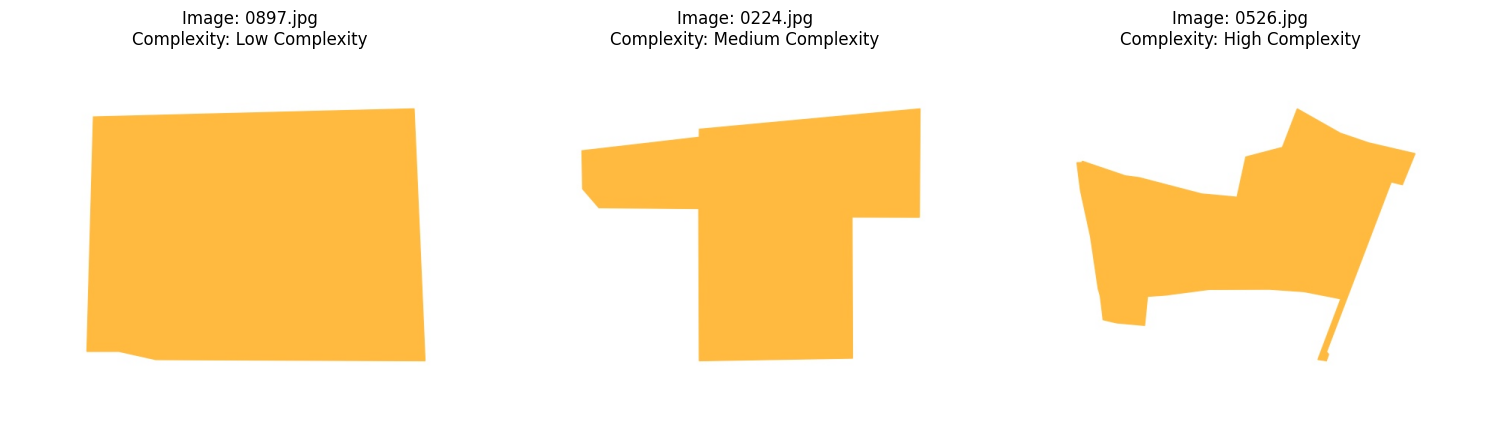

Classification based on complexity complete.


In [ ]:
# Path to the directory containing images
image_dir = '/content/drive/MyDrive/Colab Notebooks/E7-images'

# Read the CSV file and classify layouts
input_csv_path = '/content/features.csv'
threshold_low = 25
threshold_medium = 31

# Open input CSV file
with open(input_csv_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = list(reader)

# Shuffle the rows to randomize the selection
random.shuffle(rows)

# Initialize flags to track whether an image from each class is found
low_complexity_found = False
medium_complexity_found = False
high_complexity_found = False

# Classify layouts based on perimeter^2/area ratio
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for row in rows:
    image_name = row['Image Name']
    perimeter_area_ratio = float(row['Perimeter^2/Area Ratio'])

    if perimeter_area_ratio <= threshold_low and not low_complexity_found:
        complexity = 'Low Complexity'
        low_complexity_found = True
        ax_index = 0
    elif threshold_low < perimeter_area_ratio <= threshold_medium and not medium_complexity_found:
        complexity = 'Medium Complexity'
        medium_complexity_found = True
        ax_index = 1
    elif perimeter_area_ratio > threshold_medium and not high_complexity_found:
        complexity = 'High Complexity'
        high_complexity_found = True
        ax_index = 2
    else:
        continue

    # Load and display the image
    image_path = os.path.join(image_dir, image_name)
    img = cv2.imread(image_path)

    axes[ax_index].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[ax_index].set_title(f"Image: {image_name}\nComplexity: {complexity}")
    axes[ax_index].axis('off')

    # Stop iteration if images from all classes have been found
    if low_complexity_found and medium_complexity_found and high_complexity_found:
        break

plt.tight_layout()
plt.show()

print("Classification based on complexity complete.")


In [126]:
# Path to the directory containing images
image_dir = '/content/drive/MyDrive/Colab Notebooks/E7-images'

# Read the CSV file and classify layouts
input_csv_path = '/content/features.csv'
threshold_low = 25
threshold_medium = 31

# Open input CSV file
with open(input_csv_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = list(reader)

# Classify layouts based on perimeter^2/area ratio
for row in rows:
    image_name = row['Image Name']
    perimeter_area_ratio = float(row['Perimeter^2/Area Ratio'])

    if perimeter_area_ratio <= threshold_low:
        complexity = 0  # Low Complexity
    elif threshold_low < perimeter_area_ratio <= threshold_medium:
        complexity = 1  # Medium Complexity
    else:
        complexity = 2  # High Complexity

    # Add the complexity to the dataset
    row['Complexity'] = complexity

# Write the updated dataset to a new CSV file
output_csv_path = '/content/features_with_complexity.csv'
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = list(rows[0].keys())
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in rows:
        writer.writerow(row)

print("Classification and addition of complexity column complete.")


Classification and addition of complexity column complete.


In [127]:
# Function to filter layouts based on user input parameters
def filter_layouts(params, thresholds):
    filtered_layouts = []
    with open('/content/features_with_complexity.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            valid_layout = True
            for param, threshold in thresholds.items():
                # Convert row value to the appropriate data type
                row_value = float(row[param]) if param != 'Complexity' else int(row[param])
                if abs(row_value - params[param]) > threshold:
                    valid_layout = False
                    break
            if valid_layout and int(row['Complexity']) == params['Complexity']:
                filtered_layouts.append(row['Image Name'])
    return filtered_layouts

# User input for desired parameters
params = {
    'Length of Tight Fitting Box': float(input("Enter the length of the tight-fitting box: ")),
    'Width of Tight Fitting Box': float(input("Enter the width of the tight-fitting box: ")),
    'Layout Area': float(input("Enter the layout area: ")),  # Updated parameter name
    'Complexity': int(input("Enter the permissible layout complexity (0 for Low, 1 for Medium, 2 for High): "))
}

# Thresholds for parameter matching
thresholds = {
    'Length of Tight Fitting Box': float(input("Enter the threshold for length: ")),
    'Width of Tight Fitting Box': float(input("Enter the threshold for width: ")),
    'Layout Area': float(input("Enter the threshold for layout area: "))  # Updated parameter name
}

# Filter layouts based on user input
filtered_layouts = filter_layouts(params, thresholds)

# Display the filtered images
if filtered_layouts:
    num_images = len(filtered_layouts)
    cols = 5  # Number of columns for subplots
    rows = (num_images - 1) // cols + 1  # Calculate number of rows

    plt.figure(figsize=(20, 5 * rows))
    for i, image_name in enumerate(filtered_layouts, start=1):
        image_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/E7-images', image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
else:
    print("No layouts found matching the specified parameters.")


Enter the length of the tight-fitting box: 338
Enter the width of the tight-fitting box: 450
Enter the layout area: 138000
Enter the permissible layout complexity (0 for Low, 1 for Medium, 2 for High): 0
Enter the threshold for length: 10
Enter the threshold for width: 10
Enter the threshold for layout area: 10000


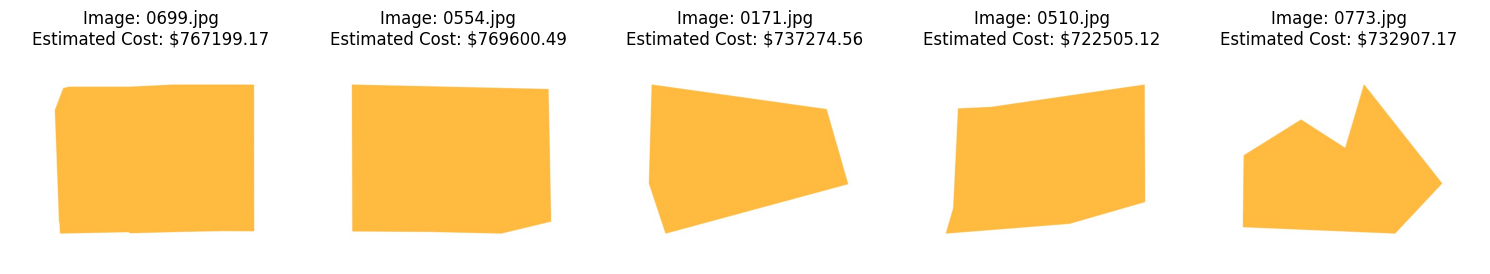

In [ ]:
import csv
import os
import cv2
import matplotlib.pyplot as plt
import random

# Function to calculate cost based on parameters
def calculate_cost(params):
    weights = {
        'Length of Tight Fitting Box': 10,
        'Width of Tight Fitting Box': 8,
        'Area of Tight Fitting Box': 5,
        'Complexity': {'Low': 1000, 'Medium': 2000, 'High': 3000}
    }
    cost = 0
    for param, value in params.items():
        if param in weights:
            if param != 'Complexity':
                cost += weights[param] * float(value)
            else:
                cost += weights[param].get(value, 0)  # Use get() to handle KeyError gracefully
    return cost

# Function to filter layouts based on user input parameters
def filter_layouts(params, thresholds):
    filtered_layouts = []
    with open('/content/features_with_complexity.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            valid_layout = True
            for param, threshold in thresholds.items():
                row_value = float(row[param]) if param != 'Complexity' else row[param]
                if abs(row_value - params[param]) > threshold:
                    valid_layout = False
                    break
            if valid_layout and row['Complexity'] == str(params['Complexity']):
                filtered_layouts.append(row)
    return filtered_layouts

# Calculate the cost for all layouts
all_layouts = []
with open('/content/features_with_complexity.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cost_params = {param: row[param] for param in ['Length of Tight Fitting Box', 'Width of Tight Fitting Box', 'Area of Tight Fitting Box', 'Complexity']}
        row['Cost'] = calculate_cost(cost_params)
        all_layouts.append(row)

# Randomly select layouts to display
random.shuffle(all_layouts)
images_to_display = min(5, len(all_layouts))  # Display maximum 5 images
plt.figure(figsize=(15, 5))
for i, layout in enumerate(all_layouts[:images_to_display], start=1):
    image_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/E7-images', layout['Image Name'])
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, images_to_display, i)
    plt.imshow(img)
    plt.title(f"Image: {layout['Image Name']}\nEstimated Cost: ${layout['Cost']:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()
